In [4]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import plotly.express as px 
# choose model class
from sklearn.mixture import GaussianMixture
from Data import testData

members = testData.df

members


,Name,f1,f2
0,Stephen George,2,5
1,Alicia Jenkins,3,5
2,Stacey Hoffman,1,1
3,Amber King,1,1
4,Eric Bowman,2,1
5,Jeffrey Fernandez,2,5
6,Anthony Edwards,3,4
7,John Galloway,3,1
8,Jocelyn Lee,1,5
9,Tamara Palmer,2,4


In [5]:
# plot features f1 and f2 for all members

rng = np.random.default_rng(0)
colors = rng.random(30)

# random sizes so that overlapping points can be distinguished 
sizes = 500 * rng.random(30)

fig = px.scatter(members, x = 'f1', y = 'f2', color ='Name', 
size=sizes, opacity=0.4, hover_name='Name')

fig.show()



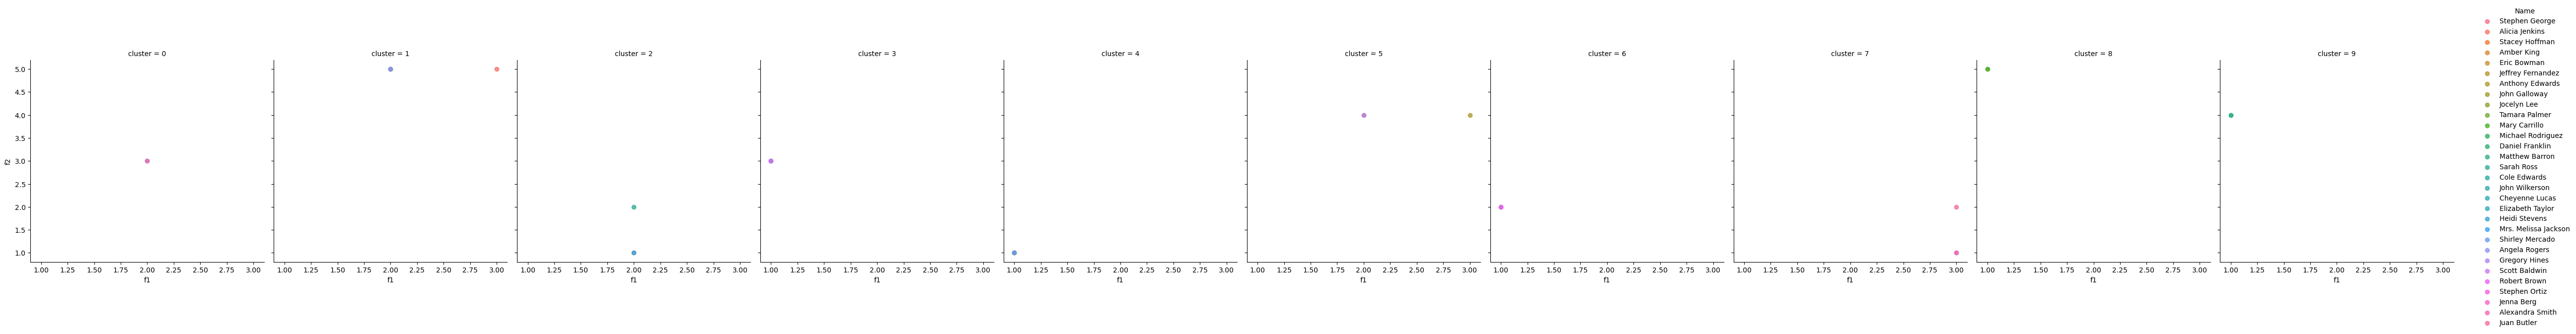

In [8]:
# instantiate model 

model = GaussianMixture(n_components=10,
covariance_type = 'full')

# Input data for model 
X_members = members.drop(columns ='Name', axis = 1)

# fit model to member data 
model.fit(X_members)  

# determine labels 
y_gmm = model.predict(X_members)

# add new y_gmm to members 
members['cluster'] = y_gmm 

sns.lmplot(x = 'f1', y= 'f2', data=members, hue='Name',
 col='cluster', fit_reg = False)



In [10]:
# print members sorted by clusters 

members = members.sort_values(by=['cluster'])
members

,Name,f1,f2,cluster
16,John Wilkerson,2,3,0
28,Alexandra Smith,2,3,0
0,Stephen George,2,5,1
1,Alicia Jenkins,3,5,1
22,Angela Rogers,2,5,1
5,Jeffrey Fernandez,2,5,1
15,Cole Edwards,2,5,1
20,Mrs. Melissa Jackson,2,1,2
14,Sarah Ross,2,2,2
4,Eric Bowman,2,1,2
